Time taken to run the GA :  0.011062383651733398
Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630
Number of generations passed is 8
Predicted output based on the best solution : 1630.0


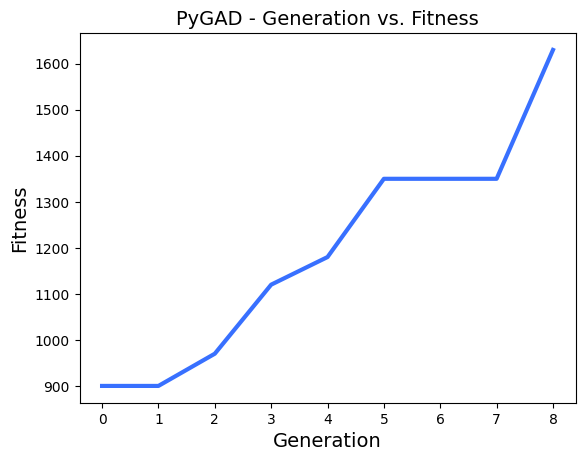

avarage time:  0.01812591552734375


In [24]:
import pygad
import numpy
import time

values = [100, 300, 200, 40, 500, 70, 100, 250, 300, 280, 300]
weights = [7,7,6,2,5,6,1,3,10,3,15]

#definiujemy parametry chromosomu
#geny to liczby: 0 lub 1
gene_space = [0, 1]

#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    waga = 0
    wartosc = 0
    for i in range(len(solution)):
        if solution[i] == 1:
            waga += weights[i]
            wartosc += values[i]
    if(waga <= 25):
        fitness = wartosc
    else:
        fitness = 0 
    return fitness

fitness_function = fitness_func

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 10
num_genes = len(S)

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5
num_generations = 60
keep_parents = 2

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 8

#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria=["reach_1600"])

#uruchomienie algorytmu
start = time.time()
ga_instance.run()
end = time.time()
print("Time taken to run the GA : ", end-start)

#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Number of generations passed is {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
prediction = numpy.sum(values*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

#0.03325700759887695
#0.0457308292388916
#0.013284921646118164
#0.011283636093139648
#0.0072612762451171875
#0.010267972946166992
#0.016607999801635742
#0.02110576629638672
#0.008745431900024414
#0.013714313507080078

avg = (0.03325700759887695+0.0457308292388916+0.013284921646118164+0.011283636093139648+0.0072612762451171875+0.010267972946166992+0.016607999801635742+0.02110576629638672+0.008745431900024414+0.013714313507080078)/10
print("avarage time: ", avg)